In [30]:
from sklearn import tree
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.DataFrame({'X_1': [1, 1, 1, 0, 0, 0, 0, 1], 'X_2': [0, 0, 0, 1, 0, 0, 0, 1], 'Y': [1, 1, 1, 1, 0, 0, 0, 0]})

In [3]:
data

,X_1,X_2,Y
0,1,0,1
1,1,0,1
2,1,0,1
3,0,1,1
4,0,0,0
5,0,0,0
6,0,0,0
7,1,1,0


In [4]:
clf = tree.DecisionTreeClassifier(criterion = 'entropy')

In [5]:
clf

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [6]:
X = data[['X_1','X_2']]
y= data['Y']

In [7]:
clf.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [36]:
titanic_data = pd.read_csv('titanic_train.csv')
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [37]:
X = titanic_data.drop(['PassengerId','Survived', 'Name','Ticket', 'Cabin'], axis = 1)
y = titanic_data.Survived

In [38]:
X = pd.get_dummies(X)
X = X.fillna({'Age':X.Age.median()})
X.head()
X.isnull().sum()

Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [11]:
clf = tree.DecisionTreeClassifier()

In [12]:
clf.fit(X,y)
#tree.plot_tree(clf, feature_names=list(X),filled=True)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [14]:
clf.score(X,y)

0.9797979797979798

In [15]:
clf.fit(X_train,y_train)
clf.score(X_test, y_test)

0.7423728813559322

In [16]:
clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 5)

In [17]:
clf.fit(X_train,y_train)
clf.score(X_test, y_test)

0.8067796610169492

In [18]:

scores_data = pd.DataFrame()

In [20]:
for max_depth in range(1,100):
    clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = max_depth)
    clf.fit(X_train,y_train)
    train_score = clf.score(X_train,y_train)
    test_score = clf.score(X_test,y_test)
    mean_cross_val_score = cross_val_score(clf, X_train, y_train, cv = 5).mean()
    
    temp_score_data = pd.DataFrame({'max_depth':[max_depth],
                                    'train_score':[train_score],
                                    'test_score':[test_score],
                                   'cross_val_score':[mean_cross_val_score]})
    scores_data = scores_data.append(temp_score_data)

In [21]:
scores_data.head()

,max_depth,train_score,test_score,cross_val_score
0,1,0.781879,0.796610,0.781857
0,2,0.805369,0.776271,0.768553
0,3,0.823826,0.820339,0.788678
0,4,0.833893,0.823729,0.783580
0,5,0.840604,0.806780,0.796942


In [22]:
scores_data_long = pd.melt(scores_data, id_vars = ['max_depth'],
                           value_vars = ['train_score','test_score','cross_val_score'],
                          var_name = 'set_type', value_name = 'score')
scores_data_long.head()

,max_depth,set_type,score
0,1,train_score,0.781879
1,2,train_score,0.805369
2,3,train_score,0.823826
3,4,train_score,0.833893
4,5,train_score,0.840604


In [23]:
scores_data_long.query('set_type == "cross_val_score"').head(20)

,max_depth,set_type,score
396,1,cross_val_score,0.781857
397,2,cross_val_score,0.768553
398,3,cross_val_score,0.788678
399,4,cross_val_score,0.783580
400,5,cross_val_score,0.796942
401,6,cross_val_score,0.792026
402,7,cross_val_score,0.788580
403,8,cross_val_score,0.791871
404,9,cross_val_score,0.795190
405,10,cross_val_score,0.795218


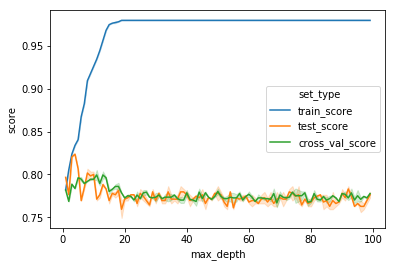

In [24]:
sns.lineplot(x = 'max_depth', y = 'score', hue = 'set_type', data = scores_data_long)

In [25]:
clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 4)

In [26]:
cross_val_score(clf, X_train, y_train, cv = 5).mean()

0.7835799743626264

In [27]:
best_clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=14)
best_clf.fit(X_train, y_train)
best_clf.score(X_test, y_test)


0.7864406779661017

In [40]:
parameters = {'criterion':['gini','entropy'], 'max_depth': range(1,30)}
clf = tree.DecisionTreeClassifier()
grid_search_cv_clf = GridSearchCV(clf, parameters, cv = 5)

In [46]:
grid_search_cv_clf.fit(X_train, y_train)
grid_search_cv_clf.best_params_

{'criterion': 'entropy', 'max_depth': 5}

In [48]:
best_clf = grid_search_cv_clf.best_estimator_
best_clf.score(X_test, y_test)

0.8101694915254237

In [51]:
from sklearn.metrics import precision_score, recall_score

In [52]:
predictions = best_clf.predict(X_test)
precision_score(y_test, predictions)
recall_score(y_test, predictions)

0.7166666666666667

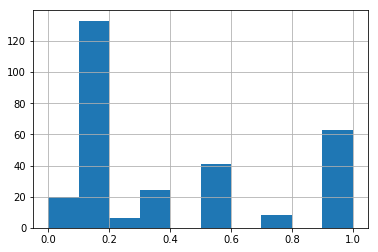

In [55]:
y_predicted_prob = best_clf.predict_proba(X_test)
pd.Series(y_predicted_prob[:,1]).hist()

In [57]:
y_pred = np.where(y_predicted_prob[:,1] > 0.8, 1, 0) 

In [58]:
precision_score(y_test, y_pred)# Меняется в зависимости от вероятности, с которой относим к разным классам

0.9206349206349206

In [59]:
recall_score(y_test, y_pred)

0.48333333333333334

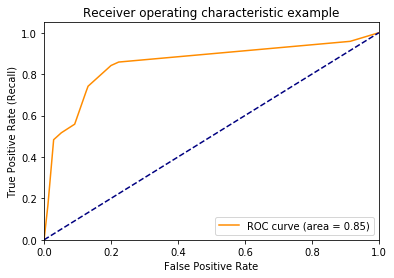

In [99]:
from sklearn.metrics import roc_curve, auc,confusion_matrix
import matplotlib.pyplot as plt
fpr, tpr, thresholds = roc_curve(y_test, y_predicted_prob[:,1])
roc_auc= auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
          label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [101]:
print(confusion_matrix(y_test, y_pred))

[[170   5]
 [ 62  58]]


In [28]:
iris_data_test = pd.read_csv('https://stepik.org/media/attachments/course/4852/test_iris.csv')
iris_data_test.head()
iris_data_train = pd.read_csv('https://stepik.org/media/attachments/course/4852/train_iris.csv')
iris_data_train.head()

,Unnamed: 0,sepal length,sepal width,petal length,petal width,species
0,130,7.4,2.8,6.1,1.9,2
1,7,5.0,3.4,1.5,0.2,0
2,11,4.8,3.4,1.6,0.2,0
3,142,5.8,2.7,5.1,1.9,2
4,109,7.2,3.6,6.1,2.5,2


In [29]:
X_test = iris_data_test.drop(['Unnamed: 0','species'], axis = 1)
y_test = iris_data_test['species']
X_train = iris_data_train.drop(['Unnamed: 0','species'], axis = 1)
y_train = iris_data_train.species
X_train.head()
print(X_test.shape, y_test.shape,X_train.shape, y_train.shape)

(50, 4) (50,) (100, 4) (100,)


In [52]:
rs = np.random.seed(0)
print(rs)

scores_iris = pd.DataFrame()

None


In [53]:
for max_depth in range(1,100):
    
    clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = max_depth, random_state = rs)
    clf.fit(X_train,y_train)
    train_score = clf.score(X_train,y_train)
    test_score = clf.score(X_test,y_test)
    
    temp_score_data = pd.DataFrame({'max_depth':[max_depth],
                                    'train_score':[train_score],
                                   'test_score':[test_score]})
    scores_iris = scores_iris.append(temp_score_data)
scores_iris.head()

,max_depth,train_score,test_score
0,1,0.70,0.60
0,2,0.97,0.94
0,3,0.99,0.94
0,4,1.00,0.92
0,5,1.00,0.92


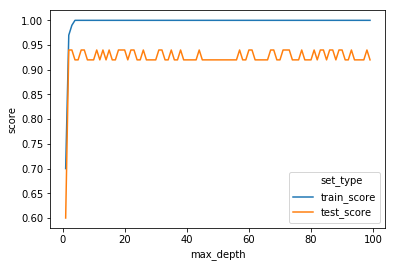

In [54]:
scores_iris_long = pd.melt(scores_iris, id_vars = ['max_depth'],
                           value_vars = ['train_score','test_score'],
                          var_name = 'set_type', value_name = 'score')
scores_iris_long.head()
sns.lineplot(x = 'max_depth', y = 'score', hue = 'set_type', data = scores_iris_long)

In [85]:
cat_dog = pd.read_csv('https://stepik.org/media/attachments/course/4852/dogs_n_cats.csv')
cat_dog = pd.get_dummies(cat_dog)
cat_dog = cat_dog.drop(['Вид_котик'],axis = 1).rename(columns = {'Вид_собачка':'Вид'}) # dog -1, cat - 0
X = cat_dog[['Длина','Высота','Шерстист','Гавкает','Лазает по деревьям']]
y = cat_dog['Вид']
X.head()

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям
0,15,18.0,1,1,0
1,20,24.0,1,0,0
2,34,40.8,1,1,0
3,26,31.2,1,1,0
4,16,19.2,1,1,0


In [86]:
clf1 = tree.DecisionTreeClassifier(criterion = 'entropy')
clf1.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [87]:
test = pd.read_json('dataset_209691_15 (1).txt')
test.head()

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям
0,21,25.2,1,1,0
1,28,33.6,1,0,0
10,15,18.0,1,1,0
11,32,38.4,1,1,0
12,22,26.4,1,0,0


In [88]:
predict = pd.DataFrame({'type':list(clf1.predict(test))})
predict[predict.type == 1].count()

type    42
dtype: int64

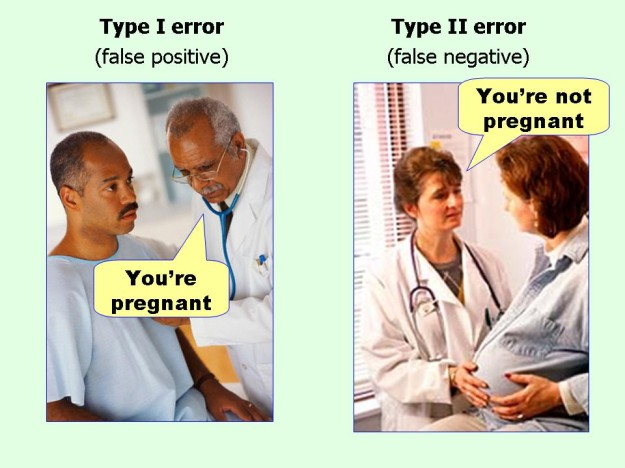

Precision = True Positive/ (True Positive + False positive) 

Recall = True Positive/ (True Positive + False negative)

precision = "не прихватить лишнее?"

recall = "не пропустить нужное ?"

## Практика

In [67]:
#1
dt = tree.DecisionTreeClassifier(max_depth = 5, min_samples_split = 5)

0.02300000000000002

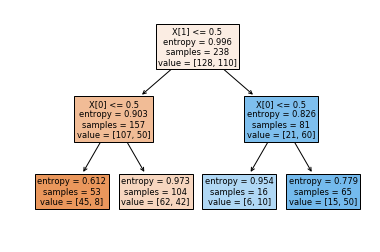

In [108]:
#2
heart = pd.read_csv('https://stepik.org/media/attachments/course/4852/train_data_tree.csv')

X_train = heart[['sex','exang']]
y_train = heart.num

clf = tree.DecisionTreeClassifier(criterion = 'entropy')
clf.fit(X_train, y_train)
tree.plot_tree(clf, filled=True)
Inf_Gain = 0.996 - 0.973
Inf_Gain 


In [ ]:
#3
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris


iris = load_iris()
x = iris.data
y = iris.target

parameters = { 'max_depth': range(1,10), 'min_samples_split': range(2,10), 'min_samples_leaf': range(1,10)}
clf = DecisionTreeClassifier()
search = GridSearchCV(clf, parameters)
best_tree = search.estimator

In [ ]:
#4
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

X_train = train.drop('y', axis = 1)
y_train = train.y

parameters = { 'max_depth': range(1,10), 'min_samples_split': range(2,10), 'min_samples_leaf': range(1,10)}
dt = DecisionTreeClassifier()
search = GridSearchCV(dt, parameters)
search.fit(X_train, y_train)
best_tree = search.best_estimator_

predictions = best_tree.predict(test)

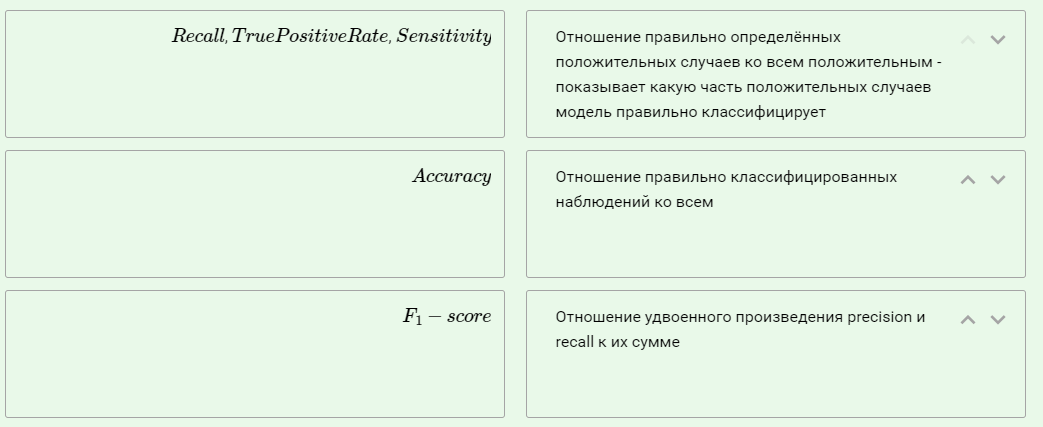

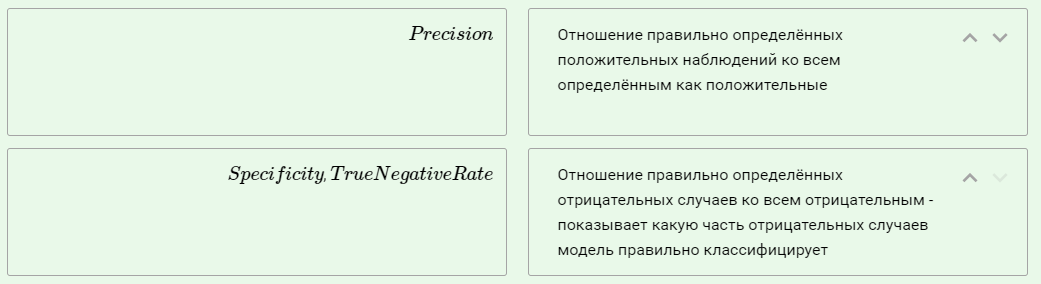